In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model as lm
import scipy.stats as st

In [2]:
def lr_fim(x, y, lr):
    w = lr.coef_
    b = lr.intercept_
    if len(y.shape) == 1:
        Sig = np.cov((y-lr.predict(x)).reshape((-1,1)).T)
        S = np.zeros((np.prod(x.shape), x.shape[1]*(x.shape[1]+1)))
        
        for i in range(x.shape[1]):
            S[i::x.shape[1], i] = 1./Sig
            S[i::x.shape[1], (i+1)*x.shape[1]:(i+2)*x.shape[1]] = x/Sig

        F = S.T@S / Sig
    
    else:    
        Sig = np.diag(np.cov((y-lr.predict(x)).T))
        S = np.zeros((np.prod(x.shape), x.shape[1]*(x.shape[1]+1)))
        for i in range(x.shape[1]):
            S[i::x.shape[1], i] = 1.
            S[i::x.shape[1], (i+1)*x.shape[1]:(i+2)*x.shape[1]] = x

        F = S.T@np.diag(list(1/Sig)*x.shape[0])@S

    return F

a = 
[[ 0.81217268 -0.30587821]
 [-0.26408588 -0.53648431]],
b = [ 0.43270381 -1.15076935]
Estimated: a = [[ 0.74016054 -0.39686179]
 [-0.27571341 -0.84442568]], b = [ 0.56871017 -0.97198715]


<Figure size 700x500 with 0 Axes>

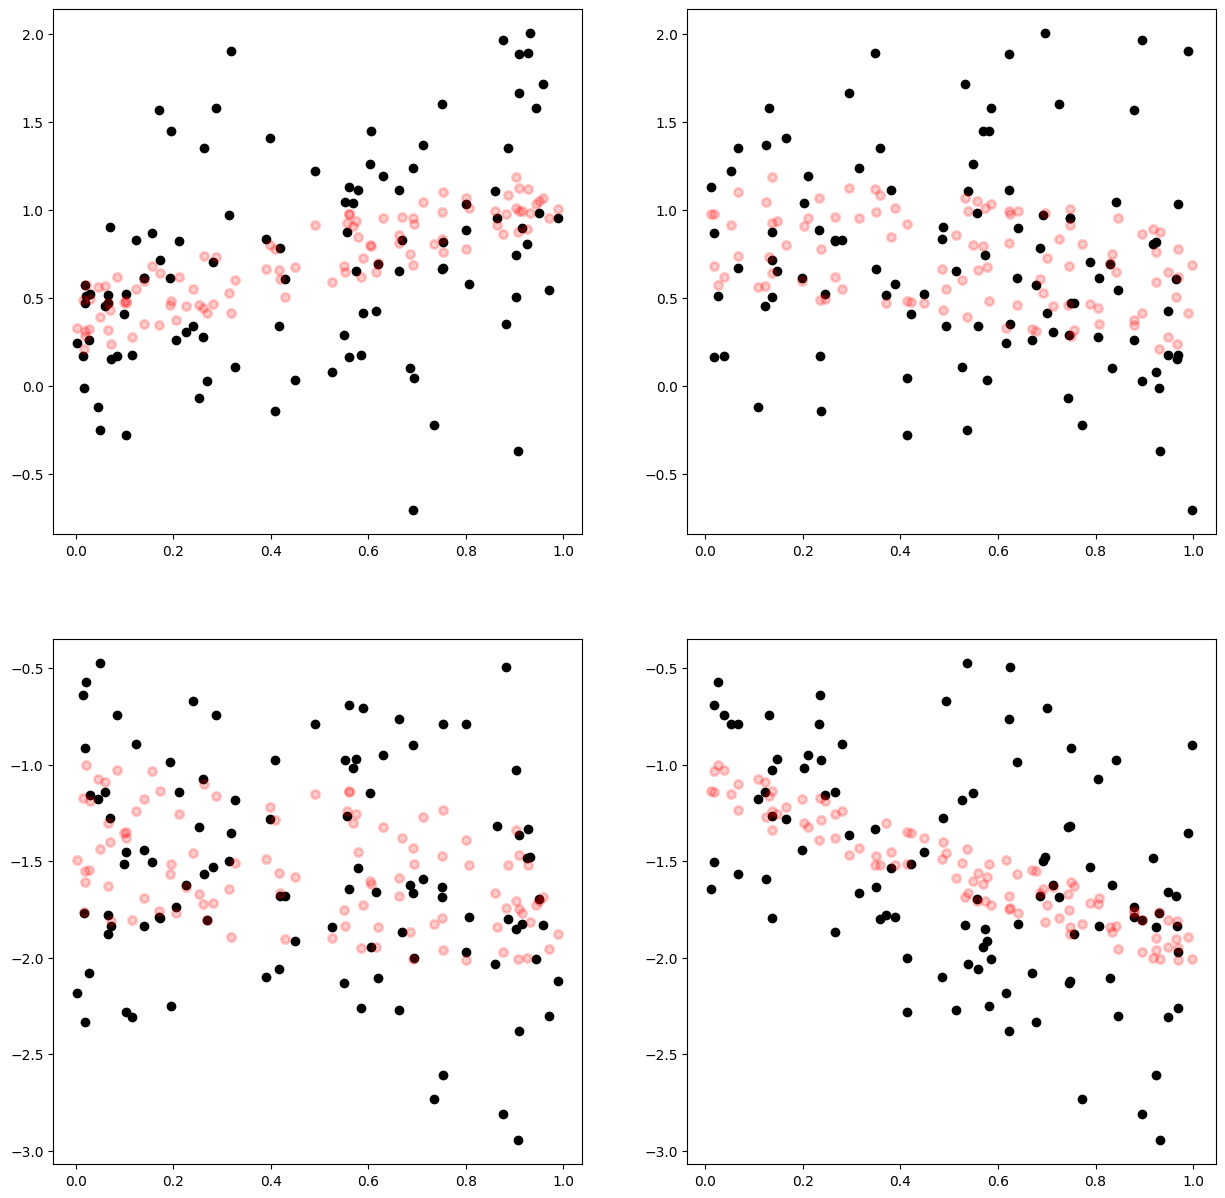

In [3]:
np.random.seed(1)
a = np.random.randn(2, 2)/2
b = np.random.randn(2)/2
print(f"a = \n{a},\nb = {b}")

x = np.random.rand(100, 2)
# x.sort()
y = x.dot(a.T)+b

err = 0.5

y += np.random.randn(*y.shape)*err

lr = lm.LinearRegression()
lr.fit(x, y)

a_est, b_est = lr.coef_, lr.intercept_
print(f"Estimated: a = {a_est}, b = {b_est}")

plt.figure(figsize=(7, 5))
plt.subplots(2, 2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        plt.subplot(2, 2, i*2+j+1)
        plt.scatter(x[:,j], y[:,i], c="k")
        plt.scatter(x[:,j], lr.predict(x)[:,i], lw=2, c="r", alpha=0.2)
plt.show()

In [4]:
F = lr_fim(x, y, lr)
cov = np.linalg.inv(F)

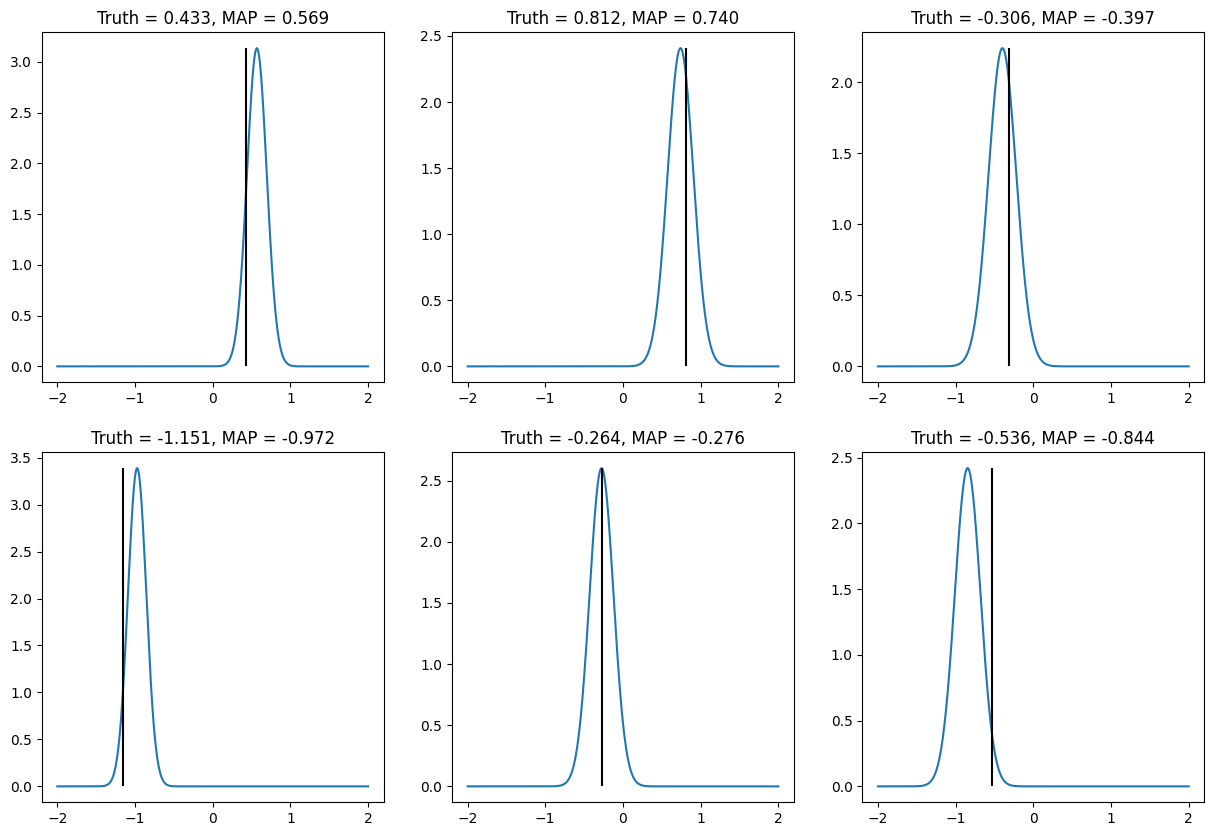

In [5]:
sup = np.linspace(-2, 2, 1000)

plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    plt.subplot(2, 3, 3*i+1)
    plt.plot(sup, st.norm.pdf(sup, b_est[i], cov[i,i]**0.5))
    plt.vlines(b[i], 0, st.norm.pdf(sup, b_est[i], cov[i,i]**0.5).max(), color="k")
    plt.title(f"Truth = {b[i]:.3f}, MAP = {b_est[i]:.3f}")
    for j in range(2):
        plt.subplot(2, 3, 3*i+j+2)
        plt.plot(sup, st.norm.pdf(sup, a_est[i,j], np.diag(cov)[2*(i+1)+j]**0.5))
        plt.vlines(a[i,j], 0, st.norm.pdf(sup, a_est[i,j], np.diag(cov)[2*(i+1)+j]**0.5).max(), color="k")
        plt.title(f"Truth = {a[i,j]:.3f}, MAP = {a_est[i,j]:.3f}")

In [6]:
A = np.linalg.cholesky(cov*np.eye(cov.shape[0]))
Z = np.random.normal(size=(6, 50))
p = A.dot(Z).T
p[:,:2] += b_est
p[:,2:] += a_est.flatten()

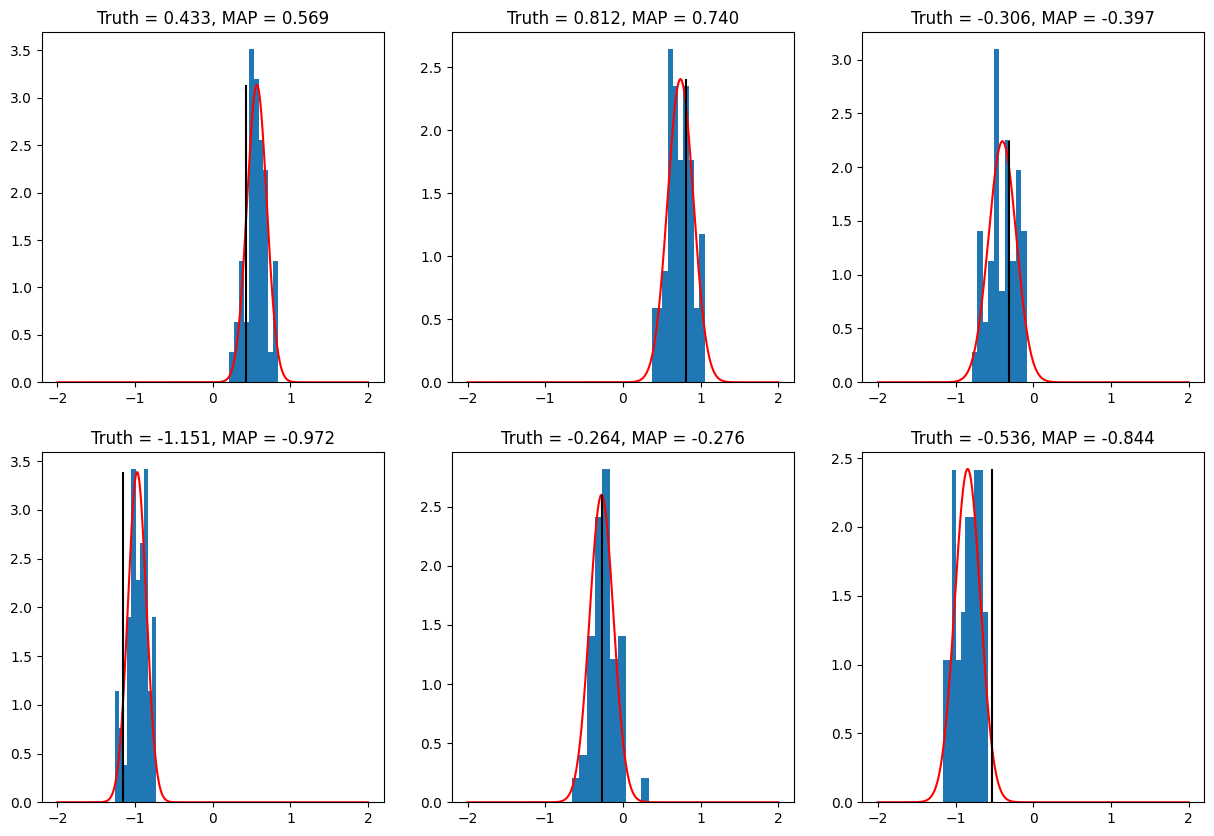

In [7]:
sup = np.linspace(-2, 2, 1000)

plt.subplots(2, 3, figsize=(15, 10))
for i in range(2):
    plt.subplot(2, 3, 3*i+1)
    plt.hist(p[:,i], density=True)
    plt.plot(sup, st.norm.pdf(sup, b_est[i], cov[i,i]**0.5), c="r")
    plt.vlines(b[i], 0, st.norm.pdf(sup, b_est[i], cov[i,i]**0.5).max(), color="k")
    plt.title(f"Truth = {b[i]:.3f}, MAP = {b_est[i]:.3f}")
    for j in range(2):
        plt.subplot(2, 3, 3*i+j+2)
        plt.hist(p[:,2*(i+1)+j], density=True)
        plt.plot(sup, st.norm.pdf(sup, a_est[i,j], np.diag(cov)[2*(i+1)+j]**0.5), c="r")
        plt.vlines(a[i,j], 0, st.norm.pdf(sup, a_est[i,j], np.diag(cov)[2*(i+1)+j]**0.5).max(), color="k")
        plt.title(f"Truth = {a[i,j]:.3f}, MAP = {a_est[i,j]:.3f}")

<Figure size 700x500 with 0 Axes>

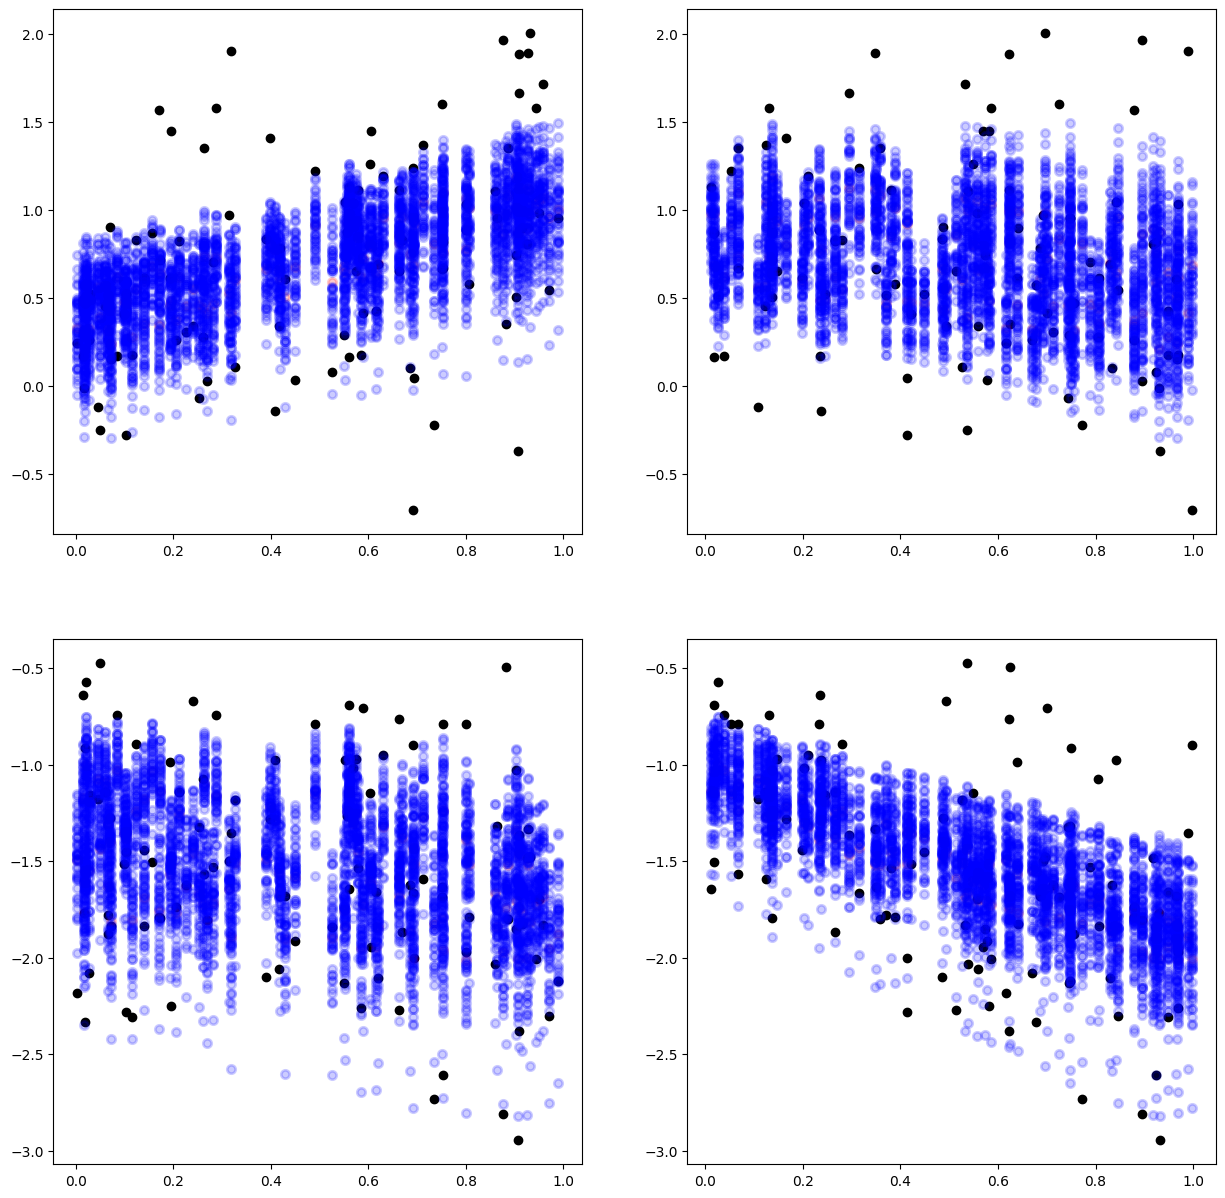

In [8]:
plt.figure(figsize=(7, 5))
plt.subplots(2, 2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        plt.subplot(2, 2, i*2+j+1)
        plt.scatter(x[:,j], y[:,i], c="k")
        plt.scatter(x[:,j], (x.dot(a_est.T)+b_est)[:,i], lw=2, c="r", alpha=0.2)
        for k in range(len(p)):
            b_ = p[k,:2]
            a_ = p[k,2:].reshape((2,2))
            plt.scatter(x[:,j], (x.dot(a_.T)+b_)[:,i], lw=2, c="b", alpha=0.2)
plt.show()

In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.74016054 -0.39686179]
 [-0.27571341 -0.84442568]] [ 0.56871017 -0.97198715]


In [10]:
lr2 = lm.LinearRegression()
lr2.fit(x, y[:,0])

print(lr2.coef_, lr2.intercept_)

[ 0.74016054 -0.39686179] 0.5687101724391223


In [11]:
lr3 = lm.LinearRegression()
lr3.fit(x, y[:,1])

print(lr3.coef_, lr3.intercept_)

[-0.27571341 -0.84442568] -0.9719871497508027


In [64]:
prof_ll = []
shift = np.arange(-1, 1.01, 0.001)

sig = (y[:,0]-lr2.predict(x)).var()
sig2 = (y[:,1]-lr3.predict(x)).var()

lr_ = lm.LinearRegression()

for d in shift:
    y_ = y.copy()
    x_ = x.copy()

    y_[:,0] -= (a_est[0,0]+d)*x[:,0]
    x_[:,0] = 0
    lr_.fit(x_, y_[:,0])
    lr_.coef_[0] = a_est[0,0]+d

    prof_ll.append(((y[:,0]-lr_.predict(x))**2).sum()/sig + ((y[:,1]-lr3.predict(x))**2).sum()/sig2)

prof_ll = np.array(prof_ll)

In [65]:
st.chi2.ppf(0.5, 100)

99.33412923598846

In [66]:
((prof_ll-prof_ll.min()<1**2/2).sum())*np.diff(shift)[0]/2

0.1165000000000001

In [67]:
cov[2,2]**0.5

0.16573163332454563

In [100]:
((prof_ll-prof_ll.min())/(prof_ll-prof_ll.min()).std()*np.sqrt(2)).var()

2.0000000000000004

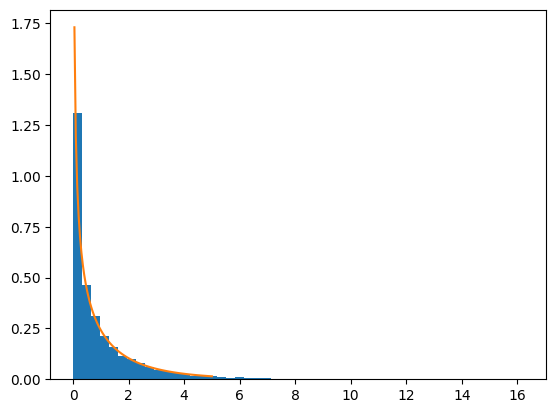

In [118]:
plt.hist(np.random.randn(10000)**2, 50, density=True)
plt.plot(np.linspace(0, 5, 100), st.chi2.pdf(np.linspace(0, 5, 100), 1))

(array([316., 130., 102.,  84.,  74.,  68.,  62.,  58.,  54.,  52.]),
 array([9.01802704e-06, 9.00008116e-01, 1.80000721e+00, 2.70000631e+00,
        3.60000541e+00, 4.50000451e+00, 5.40000361e+00, 6.30000271e+00,
        7.20000180e+00, 8.10000090e+00, 9.00000000e+00]),
 <BarContainer object of 10 artists>)

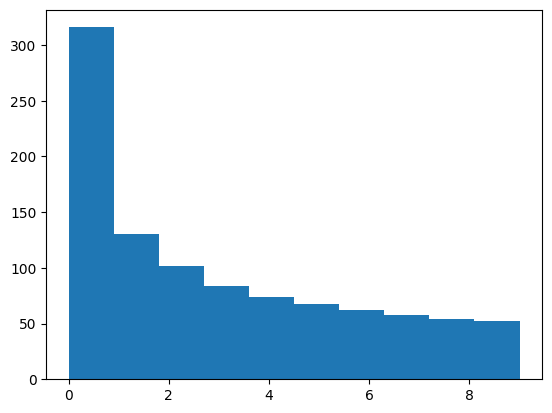

In [126]:
plt.hist(np.linspace(-3, 3, 1000)**2)

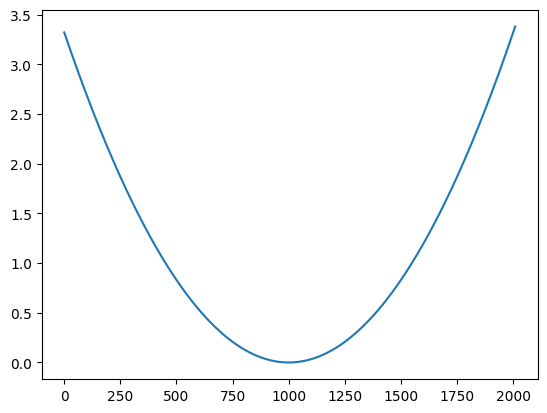

In [124]:
plt.plot((-st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max())/(-st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max()).std())

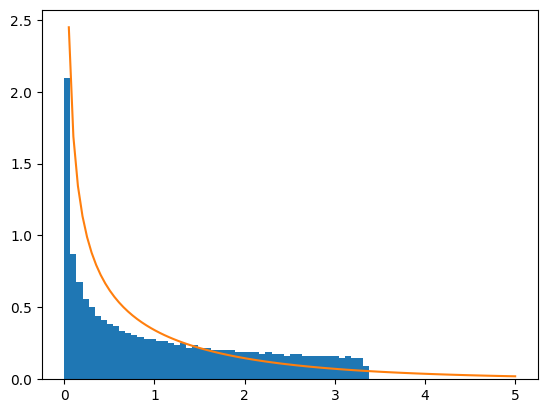

In [120]:
plt.hist((-st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max())/(-st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max()).std(), 50, density=True)
plt.plot(np.linspace(0, 5, 100), np.sqrt(2)*st.chi2.pdf(np.linspace(0, 5, 100), 1))

In [68]:
((-st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max()<1**2/2).sum())*np.diff(shift)[0]/2

0.16550000000000015

In [69]:
st.norm.rvs(a_est[0,0], cov[2,2]**0.5, 100000).std()

0.16531466772158224

(0.0, 5.0)

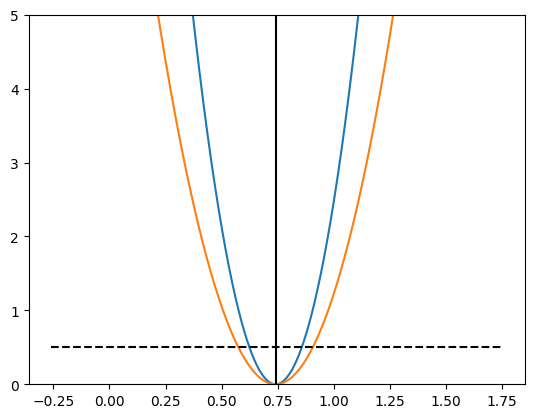

In [70]:
plt.plot(a_est[0,0]+shift, prof_ll-prof_ll.min())
# plt.yscale("log")
plt.plot(a_est[0,0]+shift, -st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5)+st.norm.logpdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5).max())
plt.vlines(a_est[0,0], 0, prof_ll.max()-prof_ll.min(), color="k")
plt.hlines(1**2/2, a_est[0,0]+shift[0], a_est[0,0]+shift[-1], color="k", ls="--")
# plt.hlines(st.chi2., a_est[0,0]+shift[0], a_est[0,0]+shift[-1], color="k", ls="--")
plt.ylim(0, 5)

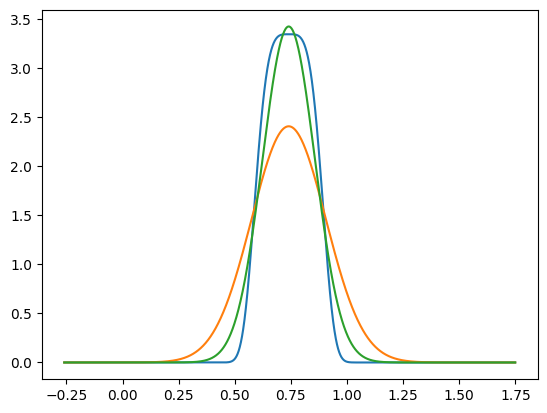

In [71]:
plt.plot(a_est[0,0]+shift, np.exp(-(prof_ll-prof_ll.min())**2)/np.exp(-(prof_ll-prof_ll.min())**2).sum()/np.diff(shift)[0])
plt.plot(a_est[0,0]+shift, st.norm.pdf(a_est[0,0]+shift, a_est[0,0], cov[2,2]**0.5))
plt.plot(a_est[0,0]+shift, st.norm.pdf(a_est[0,0]+shift, a_est[0,0], ((prof_ll-prof_ll.min()<1**2/2).sum())*np.diff(shift)[0]/2))